In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,NaN,NaN,0.27,0.5,0.0,NaN,NaN
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,NaN,0.18,0.5,0.0,NaN,NaN
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,NaN,0.45,NaN,NaN,0.5,0.0,NaN,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	445
float64		column 2	223
float64		column 3	518
float64		column 4	519
float64		column 5	74
float64		column 6	0
float64		column 7	445
float64		column 8	148


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1039.000000,1261.000000,966.000000,965.000000,1410.000000,1484.000000,1039.000000,1336.000000
mean,0.499528,0.500531,0.500580,0.265430,0.504965,0.007500,0.499759,0.275786
std,0.137913,0.122758,0.087541,0.141061,0.049592,0.075683,0.058345,0.106840
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.330000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.720000,1.000000


<AxesSubplot:>

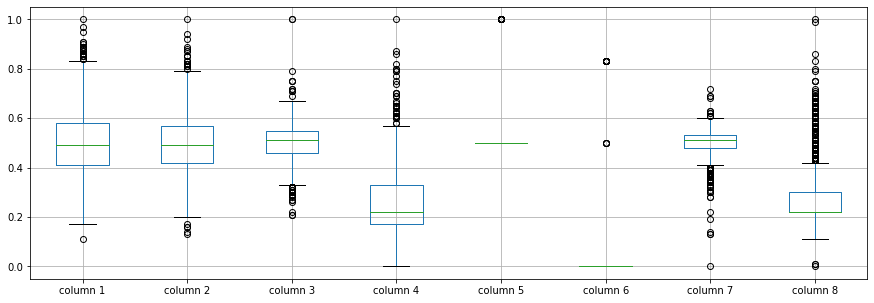

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499528
column 2    0.500531
column 3    0.500580
column 4    0.265430
column 5    0.504965
column 6    0.007500
column 7    0.499759
column 8    0.275786
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.598378,-0.140371,0.131062,0.065064,0.018000,0.045720,-0.172857
column 2,0.598378,1.000000,-0.261735,0.125124,0.089909,0.013366,0.092114,-0.089721
column 3,-0.140371,-0.261735,1.000000,0.081704,0.000829,-0.021723,-0.232292,-0.022295
column 4,0.131062,0.125124,0.081704,1.000000,-0.004667,0.022800,-0.164360,-0.072515
column 5,0.065064,0.089909,0.000829,-0.004667,1.000000,-0.009827,0.052130,-0.004675
column 6,0.018000,0.013366,-0.021723,0.022800,-0.009827,1.000000,-0.004612,-0.029631
column 7,0.045720,0.092114,-0.232292,-0.164360,0.052130,-0.004612,1.000000,0.099527
column 8,-0.172857,-0.089721,-0.022295,-0.072515,-0.004675,-0.029631,0.099527,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+26,8+26+26,8+26+26+26,8+26+26+26+26,8+26+26+26+26+26,8+26+26+26+26+26+26,8+26+26+26+26+26,8+26+26+26+26,8+26+26+26,8+26+26,8+26,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.349116263182267
Epoch: 1 , loss: 1.9842011267724244
Epoch: 2 , loss: 1.8074127889197806
Epoch: 3 , loss: 1.7025608226009037
Epoch: 4 , loss: 1.567274149345315
Epoch: 5 , loss: 1.5056573761546093
Epoch: 6 , loss: 1.4390754298023556
Epoch: 7 , loss: 1.3699756446092024
Epoch: 8 , loss: 1.2993221334789111
Epoch: 9 , loss: 1.2684424526017646
Epoch: 10 , loss: 1.2180522110151208
Epoch: 11 , loss: 1.1674921668094138
Epoch: 12 , loss: 1.1473985094091166
Epoch: 13 , loss: 1.11963731115279
Epoch: 14 , loss: 1.09467202813729
Epoch: 15 , loss: 1.0779460325189258
Epoch: 16 , loss: 1.0468401150858921
Epoch: 17 , loss: 1.0414223878279976
Epoch: 18 , loss: 1.0065317121536836
Epoch: 19 , loss: 1.0085241930640263
Epoch: 20 , loss: 0.9873731421387714
Epoch: 21 , loss: 0.9746424750141476
Epoch: 22 , loss: 0.9777098375818004
Epoch: 23 , loss: 0.9522704598696335
Epoch: 24 , loss: 0.9400760168614595
Epoch: 25 , loss: 0.9202

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.426570
column 2    0.440000
column 3    0.426934
column 4    0.224288
column 5    0.430701
column 6    0.000000
column 7    0.510000
column 8    0.220000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,-0.170793,0.014520,0.000000,0.0,0.0,-0.030783,0.048636
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1479,0.000000,-0.151271,0.000729,0.000000,0.0,0.0,-0.025961,0.041595
1480,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1481,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1482,-0.061063,0.000000,-0.159620,-0.010462,0.0,0.0,-0.126302,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.829023357535927, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.166915388135064

In [18]:
new_df.iloc[66,:]

column 1    0.541354
column 2    0.490000
column 3    0.552403
column 4    0.279559
column 5    0.557959
column 6    0.000000
column 7    0.440000
column 8    0.220000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.610000,0.470000,0.130000,0.5,0.0,0.480000,0.220000
1,0.430000,0.499207,0.494520,0.270000,0.5,0.0,0.499217,0.268636
2,0.640000,0.620000,0.490000,0.150000,0.5,0.0,0.530000,0.220000
3,0.580000,0.440000,0.570000,0.130000,0.5,0.0,0.540000,0.220000
4,0.420000,0.440000,0.480000,0.540000,0.5,0.0,0.480000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.820000,0.478729,0.470729,0.180000,0.5,0.0,0.474039,0.261595
1480,0.350000,0.290000,0.460000,0.140000,0.5,0.0,0.540000,0.660000
1481,0.410000,0.470000,0.500000,0.140000,0.5,0.0,0.530000,0.370000
1482,0.448937,0.450000,0.460380,0.239538,0.5,0.0,0.463698,0.220000


In [20]:
imputations[-1].to_excel("Yeast_AG_20(imp).xlsx", index=False, header=False)